In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, mean_squared_error
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,AdaBoostRegressor,BaggingClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [3]:
d=pd.read_csv('DATA.csv')
d.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
d.shape

(59381, 128)

In [5]:
d.info('Id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
Id                     int64
Product_Info_1         int64
Product_Info_2         object
Product_Info_3         int64
Product_Info_4         float64
Product_Info_5         int64
Product_Info_6         int64
Product_Info_7         int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2      int64
Employment_Info_3      int64
Employment_Info_4      float64
Employment_Info_5      int64
Employment_Info_6      float64
InsuredInfo_1          int64
InsuredInfo_2          int64
InsuredInfo_3          int64
InsuredInfo_4          int64
InsuredInfo_5          int64
InsuredInfo_6          int64
InsuredInfo_7          int64
Insurance_History_1    int64
Insurance_History_2    int64
Insurance_History_3    int64
Insurance_History_4    int64
Insurance_History_5    float64
I

In [6]:
d.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [7]:
# Finding the percent of null values
x=list(d.columns)
for y in range (0,128):
    a=d[x[y]].isnull().sum()
    if  a>0:
        b=(a/59381)*100
        print(x[y],' =  ',b,'%')
        y=y+1

Employment_Info_1  =   0.031996766642528755 %
Employment_Info_4  =   11.41610952998434 %
Employment_Info_6  =   18.278573954631952 %
Insurance_History_5  =   42.7678887186137 %
Family_Hist_2  =   48.25786025833179 %
Family_Hist_3  =   57.66322561088564 %
Family_Hist_4  =   32.3066300668564 %
Family_Hist_5  =   70.41141105740894 %
Medical_History_1  =   14.969434667654639 %
Medical_History_10  =   99.06198952526903 %
Medical_History_15  =   75.1014634310638 %
Medical_History_24  =   93.59896263114464 %
Medical_History_32  =   98.1357673329853 %


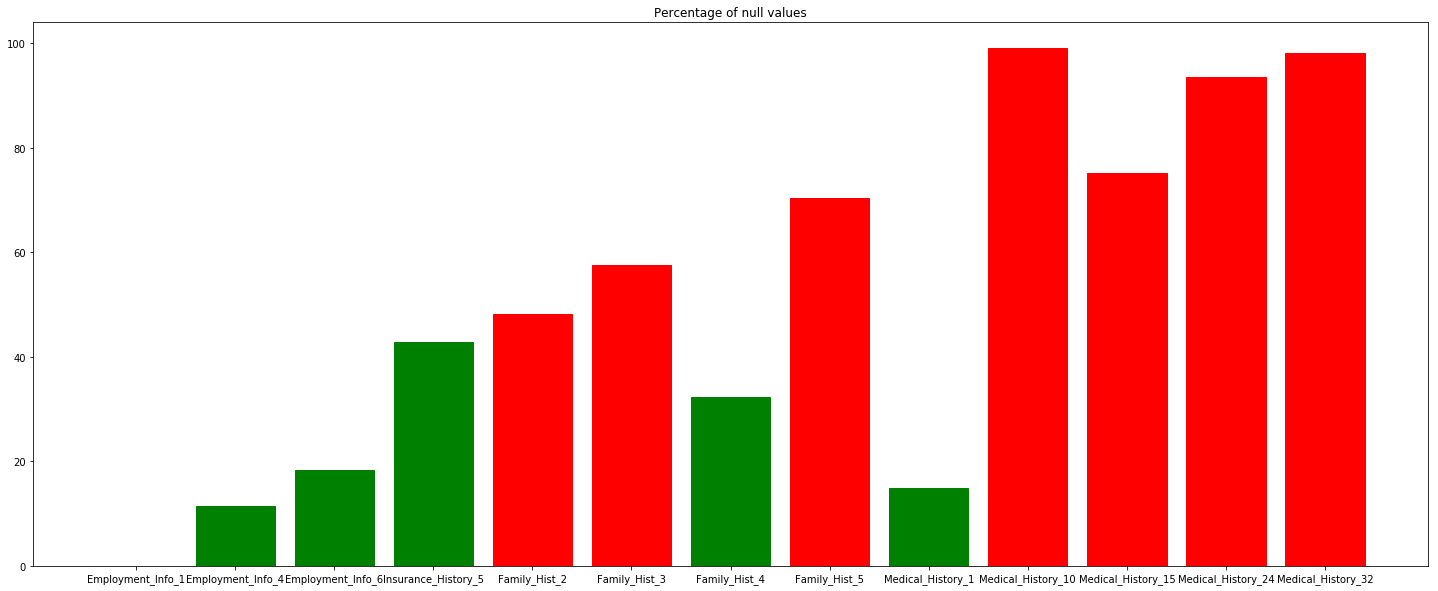

In [8]:
column=['Employment_Info_1','Employment_Info_4','Employment_Info_6','Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5','Medical_History_1','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
nullvalues=[0.03,11.41,18.27,42.76,48.25,57.66,32.30,70.41,14.96,99.06,75.10,93.59,98.13]
fig, ax = plt.subplots(figsize=(25, 10))
barplot=plt.bar(column,nullvalues, label="Example two", color='b')
plt.title('Percentage of null values')
barplot[4].set_color('r')
barplot[5].set_color('r')
barplot[7].set_color('r')
barplot[9].set_color('r')
barplot[10].set_color('r')
barplot[11].set_color('r')
barplot[12].set_color('r')
barplot[0].set_color('g')
barplot[1].set_color('g')
barplot[2].set_color('g')
barplot[3].set_color('g')
barplot[6].set_color('g')
barplot[8].set_color('g')


In [9]:
#Dropping the columns which have more than 50% of null values
d.drop(['Id','Ht','Wt','Family_Hist_2','Family_Hist_3','Family_Hist_5','Medical_History_10',
      'Medical_History_15','Medical_History_24','Medical_History_32'],axis=1,inplace=True)

In [10]:
# Imputing null values in features with less than 50 % null values
d['Employment_Info_1'].fillna(d['Employment_Info_1'].median(),inplace=True)
d['Employment_Info_4'].fillna(d['Employment_Info_4'].median(),inplace=True)
d['Employment_Info_6'].fillna(d['Employment_Info_6'].median(),inplace=True)
d['Insurance_History_5'].fillna(d['Insurance_History_5'].median(),inplace=True)
d['Family_Hist_4'].fillna(d['Family_Hist_4'].median(),inplace=True)
d['Medical_History_1'].fillna(1,inplace=True)

In [11]:
#converting the correlation matrix into dataframe
d1=pd.DataFrame(d.corr())


In [12]:
# Extracting the columns which have correlation more than 0.4
df = d1.where(np.triu(np.ones(d1.shape)).astype(np.bool))
a=list(df.columns)
b=a
for y in range(0,117):
    q=list(df[a[y]])
    for i in q:
        if i> 0.4 and a[y]!=b[q.index(i)]:
            
            print(a[y],'--',b[q.index(i)],' = ',i)

InsuredInfo_7 -- InsuredInfo_2  =  0.5087155135728652
Insurance_History_4 -- Insurance_History_1  =  0.5672153896999304
Insurance_History_7 -- Insurance_History_1  =  0.4586056676825122
Insurance_History_7 -- Insurance_History_4  =  0.9195259814197974
Insurance_History_8 -- Insurance_History_1  =  0.7877234559145828
Insurance_History_9 -- Insurance_History_1  =  0.5085844516104937
Insurance_History_9 -- Insurance_History_4  =  0.9386544745126755
Insurance_History_9 -- Insurance_History_7  =  0.9625280994167774
Family_Hist_4 -- Ins_Age  =  0.5907509990624774
Medical_History_36 -- Medical_History_25  =  0.9541101722846125
Medical_Keyword_1 -- Medical_History_16  =  0.46476010319662225
Medical_Keyword_16 -- Medical_History_18  =  0.4689211178690135
Medical_Keyword_22 -- Medical_History_21  =  0.536244883658995
Medical_Keyword_30 -- Medical_History_19  =  0.8409466745887633
Medical_Keyword_34 -- Medical_History_18  =  0.6053300357526505
Medical_Keyword_41 -- Medical_History_30  =  0.428327

In [13]:
x=pd.get_dummies(d['Product_Info_2'],prefix='ProductInfo2',drop_first=True)
x.head()

,ProductInfo2_A2,ProductInfo2_A3,ProductInfo2_A4,ProductInfo2_A5,ProductInfo2_A6,ProductInfo2_A7,ProductInfo2_A8,ProductInfo2_B1,ProductInfo2_B2,ProductInfo2_C1,ProductInfo2_C2,ProductInfo2_C3,ProductInfo2_C4,ProductInfo2_D1,ProductInfo2_D2,ProductInfo2_D3,ProductInfo2_D4,ProductInfo2_E1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
d=pd.concat([d,x],axis=1)

In [15]:
d.drop('Product_Info_2',axis=1,inplace=True)

In [16]:
j=[]
l=[]
u=[]
a=list(d.columns)
for y in range(0,134):
    q3=d[a[y]].quantile(0.75)
    q1=d[a[y]].quantile(0.25)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    if ul!=ll:
        
        for i in d[a[y]]:
            if i>ul or i<ll:
                j.append(a[y])
                l.append(ll)
                u.append(ul)
print('Features with outliers',set(j))
print('lower boundary of features',set(l))
print('Upper boundary of features',set(u))

Features with outliers {'Insurance_History_5', 'Employment_Info_1', 'Family_Hist_4', 'BMI', 'Medical_History_1'}
lower boundary of features {0.1645042030000001, -0.0625, 0.21126760599999997, -0.00023333299999999996, -9.5}
Upper boundary of features {0.7538703469999999, 0.1975, 0.66197183, 0.0021666669999999997, 18.5}


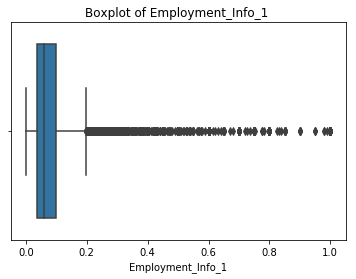

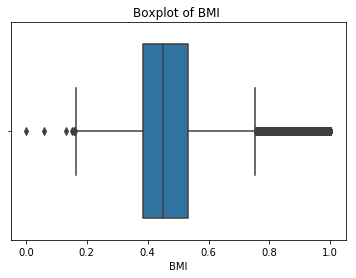

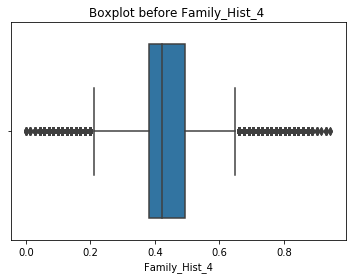

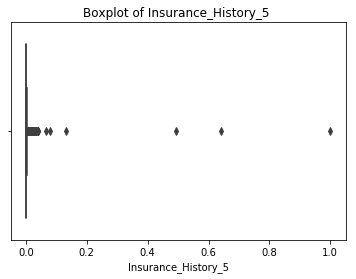

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(d['Employment_Info_1'])
plt.title('Boxplot of Employment_Info_1 ')
plt.show()

sns.boxplot(d['BMI'])
plt.title('Boxplot of BMI ')
plt.show()

sns.boxplot(d['Family_Hist_4'])
plt.title('Boxplot before Family_Hist_4 ')
plt.show()

sns.boxplot(d['Insurance_History_5'])
plt.title('Boxplot of Insurance_History_5 ')
plt.show()

In [18]:
print('Skewness of features')
print('Insurance_History_5 = ',d['Insurance_History_5'].skew())
print('Family_Hist_4 = ',d['Family_Hist_4'].skew())
print('Employment_Info_1 = ',d['Employment_Info_1'].skew())
print('BMI = ',d['BMI'].skew())

Skewness of features
Insurance_History_5 =  134.89155609994165
Family_Hist_4 =  0.4091113228795351
Employment_Info_1 =  4.709403418654449
BMI =  0.944260717685289


In [19]:
for col in ['Insurance_History_5','Family_Hist_4','Employment_Info_1','BMI']:
    percentiles = d[col].quantile([0.01,0.99]).values
    d[col][d[col] <= percentiles[0]] = percentiles[0]
    d[col][d[col] >= percentiles[1]] = percentiles[1]

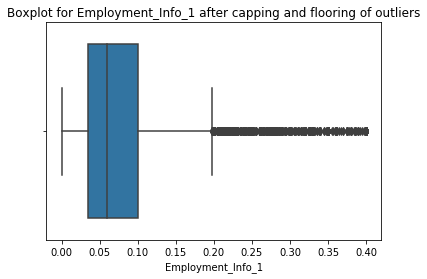

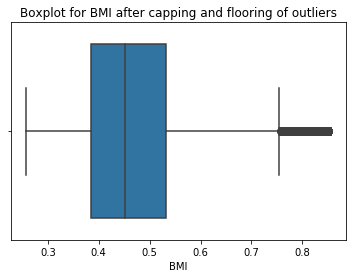

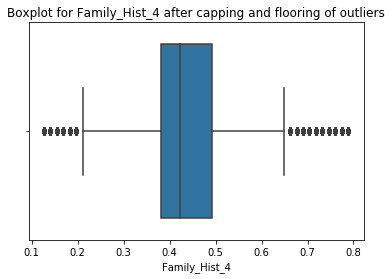

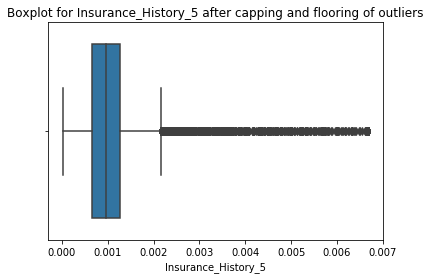

In [20]:
sns.boxplot(d['Employment_Info_1'])
plt.title('Boxplot for Employment_Info_1 after capping and flooring of outliers')
plt.show()

plt.title('Boxplot for BMI after capping and flooring of outliers')
sns.boxplot(d['BMI'])
plt.show()

plt.title('Boxplot for Family_Hist_4 after capping and flooring of outliers')
sns.boxplot(d['Family_Hist_4'])
plt.show()


plt.title('Boxplot for Insurance_History_5 after capping and flooring of outliers')
sns.boxplot(d['Insurance_History_5'])
plt.show()

In [21]:
print('Skewness of features')
print('Insurance_History_5 = ',d['Insurance_History_5'].skew())
print('Family_Hist_4 = ',d['Family_Hist_4'].skew())
print('Employment_Info_1 = ',d['Employment_Info_1'].skew())
print('BMI = ',d['BMI'].skew())

Skewness of features
Insurance_History_5 =  2.6319732668048093
Family_Hist_4 =  0.4072228128371821
Employment_Info_1 =  2.2854012387923675
BMI =  0.8166862152362031


In [22]:
d.groupby(['Response'])['Employment_Info_1'].count()

Response
1     6207
2     6552
3     1013
4     1428
5     5432
6    11233
7     8027
8    19489
Name: Employment_Info_1, dtype: int64

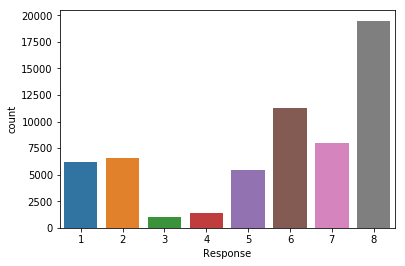

In [23]:
sns.countplot(d['Response'])

In [24]:
x=d.drop(['Response'], axis=1)
y=d[['Response']]

In [25]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x,y= smt.fit_sample(x,y)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6489930303159875


In [28]:
#to submit csv file
pd.DataFrame(x_train).to_csv(r'C:\Users\ADMIN\Documents\dse\Resume projects/x_trainInsurance.csv',index=False)
pd.DataFrame(x_test).to_csv(r'C:\Users\ADMIN\Documents\dse\Resume projects/x_testInsurance.csv',index=False)

In [29]:
pd.DataFrame(d).to_csv(r'C:\Users\ADMIN\Documents\dse\Resume projects/Insurancedata.csv',index=False)

In [38]:
x_train

array([[-0.17787857,  0.28906943, -0.52932116, ..., -0.64291577,
        -0.4486227 , -0.22885632],
       [-0.17787857, -3.13902447, -0.77548813, ..., -0.64291577,
        -0.4486227 ,  4.3747689 ],
       [-0.17787857,  0.28906943,  0.82574795, ..., -0.64291577,
        -0.4486227 , -0.22885632],
       ...,
       [-0.17787857,  0.28906943, -0.42214001, ..., -0.64291577,
        -0.4486227 , -0.22885632],
       [-0.17787857, -3.13902447, -0.86195421, ..., -0.64291577,
        -0.4486227 , -0.22885632],
       [-0.17787857,  0.28906943, -1.17839837, ..., -0.64291577,
        -0.4486227 , -0.22885632]])

In [27]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler().fit_transform(d)
x_train =StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [28]:
from sklearn.decomposition import PCA
pca=PCA()
X_train_2 = pca.fit_transform(x_train)
X_test_2 = pca.transform(x_test)


In [29]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([4.65687553e-02, 3.02976163e-02, 2.44954900e-02, 2.14046272e-02,
       1.90118485e-02, 1.68880274e-02, 1.55554487e-02, 1.47674821e-02,
       1.41466827e-02, 1.33300385e-02, 1.32103403e-02, 1.29495727e-02,
       1.25919396e-02, 1.25028625e-02, 1.22776438e-02, 1.21309528e-02,
       1.18338675e-02, 1.18126857e-02, 1.17031164e-02, 1.13609142e-02,
       1.10893490e-02, 1.09103528e-02, 1.07014093e-02, 9.90500223e-03,
       9.58989229e-03, 9.18531433e-03, 9.11993495e-03, 8.77936053e-03,
       8.70547603e-03, 8.53788053e-03, 8.47417696e-03, 8.32554273e-03,
       8.31446932e-03, 8.16017005e-03, 8.12839620e-03, 8.08349309e-03,
       8.06384956e-03, 7.95297652e-03, 7.93425632e-03, 7.91045498e-03,
       7.84311903e-03, 7.81745113e-03, 7.81513997e-03, 7.77360902e-03,
       7.75205812e-03, 7.73858015e-03, 7.67912637e-03, 7.65340987e-03,
       7.64248031e-03, 7.61823686e-03, 7.60018385e-03, 7.57069653e-03,
       7.54804928e-03, 7.54253454e-03, 7.52038694e-03, 7.48399272e-03,
      

In [30]:
cumvar=np.cumsum(pca.explained_variance_ratio_)
cumvar

array([0.04656876, 0.07686637, 0.10136186, 0.12276649, 0.14177834,
       0.15866636, 0.17422181, 0.1889893 , 0.20313598, 0.21646602,
       0.22967636, 0.24262593, 0.25521787, 0.26772073, 0.27999838,
       0.29212933, 0.3039632 , 0.31577588, 0.327479  , 0.33883991,
       0.34992926, 0.36083961, 0.37154102, 0.38144603, 0.39103592,
       0.40022123, 0.40934117, 0.41812053, 0.426826  , 0.43536388,
       0.44383806, 0.4521636 , 0.46047807, 0.46863824, 0.47676664,
       0.48485013, 0.49291398, 0.50086696, 0.50880122, 0.51671167,
       0.52455479, 0.53237224, 0.54018738, 0.54796099, 0.55571305,
       0.56345163, 0.57113075, 0.57878416, 0.58642664, 0.59404488,
       0.60164506, 0.60921576, 0.61676381, 0.62430635, 0.63182673,
       0.63931072, 0.64677334, 0.65422711, 0.66167612, 0.66907256,
       0.6764631 , 0.68380502, 0.69112307, 0.69842545, 0.70571034,
       0.71296584, 0.72016881, 0.72735574, 0.73453358, 0.7416914 ,
       0.74879913, 0.75588471, 0.76296932, 0.77001963, 0.77703

In [31]:
X_train_2.shape

(109138, 134)

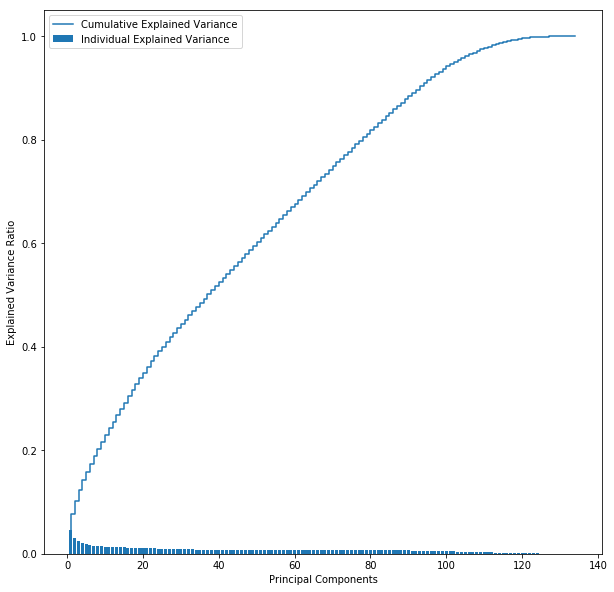

In [32]:
plt.figure(figsize=(10,10))
plt.bar(range(1,135), pca.explained_variance_ratio_, label = 'Individual Explained Variance')
plt.step(range(1,135), cumvar, label = 'Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend()
plt.show()

In [29]:
# applying rf base model
rf=RandomForestClassifier(n_estimators=20, random_state=100)
rf.fit(X_train_2,y_train)
y_pred_rf = rf.predict(X_test_2)
ac_rf= accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", ac_rf)

Accuracy Score: 0.6920725189207679


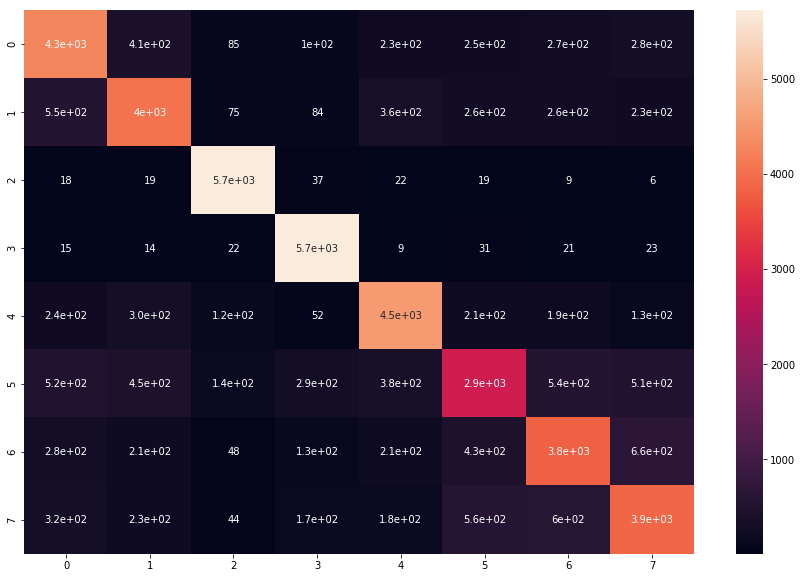

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True)


In [33]:
#applying gs on base rf model
rf=RandomForestClassifier(random_state=100)
#kf=KFold(n_splits=5,shuffle=True,random_state=100)
param={'n_estimators':[20,30,40,50],'criterion':['gini','entropy']}
GS_rf=GridSearchCV(rf,param,cv=5,scoring='precision_weighted',n_jobs=-1)
GS_rf.fit(X_train_2,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'c

In [34]:
GS_rf.best_params_

{'criterion': 'gini', 'n_estimators': 50}

In [37]:
rf=RandomForestClassifier(n_estimators=50, random_state=100,criterion='gini')
rf.fit(X_train_2,y_train)
y_pred_rf = rf.predict(X_test_2)
ac_rf= accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", ac_rf)

Accuracy Score: 0.7460127421216916


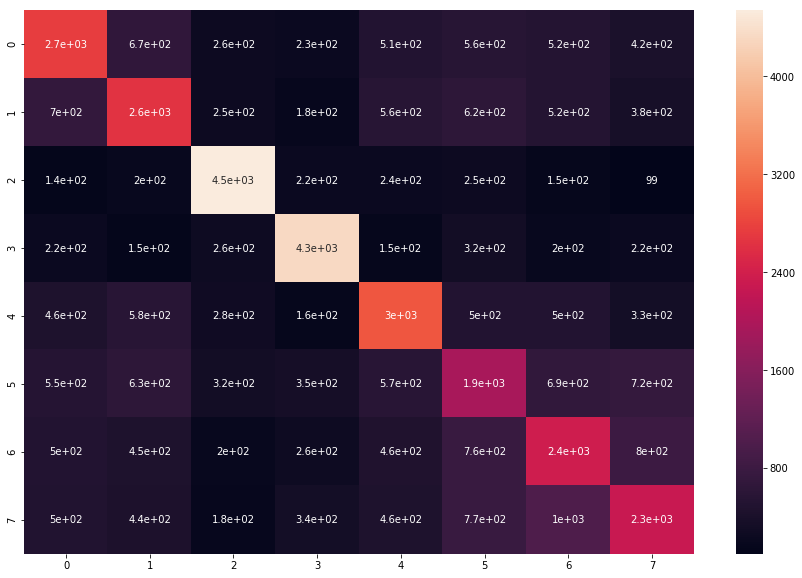

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True)


In [41]:
#Applying base NB model
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train_2, y_train)
y_pred_nb = gnb.predict(X_test_2)
ac_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy Score:", ac_nb)

Accuracy Score: 0.23592166588275537


In [42]:
#Applying bagging Naive Bayes
nb_bag=BaggingClassifier(base_estimator=gnb,random_state=100)
nb_bag.fit(X_train_2,y_train)
nb_bag_pred=nb_bag.predict(X_test_2)
ac_nb_bag=accuracy_score(nb_bag_pred,y_test)
print('Accuracy Score:', ac_nb_bag)

Accuracy Score: 0.23510924872792577


In [43]:
#applying gs on bagging nb model
kf=KFold(n_splits=5,shuffle=True,random_state=100)
param={'n_estimators':np.arange(1,20)}
GS_nb_bag=GridSearchCV(nb_bag,param,cv=kf,scoring='precision_weighted',n_jobs=-1)
GS_nb_bag.fit(X_train_2,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=GaussianNB(priors=None,
                                                                   var_smoothing=1e-09),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=100,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision_weighted', verbose=0)

In [44]:
GS_nb_bag.best_params_

{'n_estimators': 6}

In [45]:
#Applying bagging Naive Bayes using best params
nb_bag=BaggingClassifier(base_estimator=gnb,random_state=100,n_estimators=6)
nb_bag.fit(X_train_2,y_train)
nb_bag_pred=nb_bag.predict(X_test_2)
ac_nb_bag=accuracy_score(nb_bag_pred,y_test)
print('Accuracy Score:', ac_nb_bag)

Accuracy Score: 0.23453200496002052


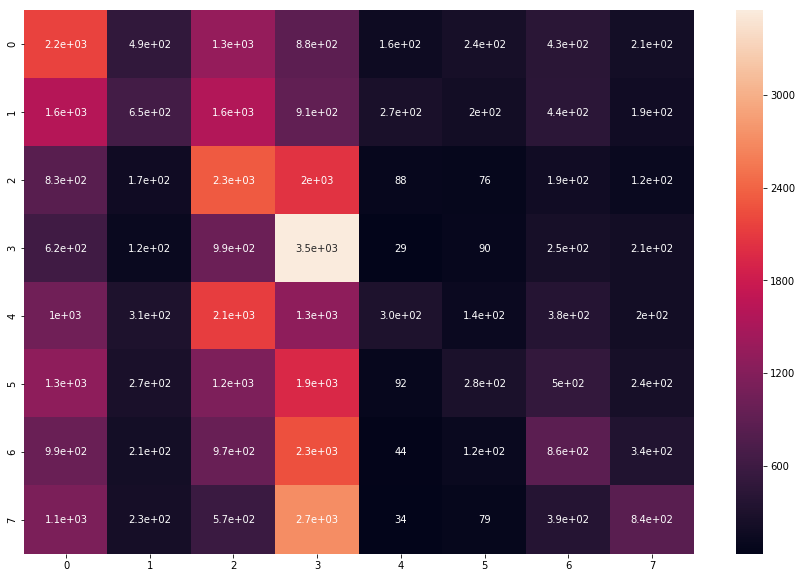

In [77]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test,nb_bag_pred),annot=True)


In [52]:
#Base dt model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=100)
dt.fit(X_train_2,y_train)
y_pred_dt=dt.predict(X_test_2)
ac_dt=accuracy_score(y_pred_dt,y_test)
print('Accuracy Score:', ac_dt)

Accuracy Score: 0.5076110659768247


In [47]:
#applying gs on base dt model
dt=DecisionTreeClassifier()
kf=KFold(n_splits=5,shuffle=True,random_state=100)
param={'criterion':['gini','entropy'],'max_depth':[30,40]}
GS_dt=GridSearchCV(dt,param,cv=kf,scoring='precision_weighted',n_jobs=-1)
GS_dt.fit(X_train_2,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [48]:
GS_dt.best_params_

{'criterion': 'entropy', 'max_depth': 30}

In [55]:
#Base dt model after gs
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=100,criterion='entropy',n_jobs=-1)
dt.fit(X_train_2,y_train)
y_pred_dt=dt.predict(X_test_2)
ac_dt=accuracy_score(y_pred_dt,y_test)
print('Accuracy Score:', ac_dt)

Accuracy Score: 0.5090007268995596


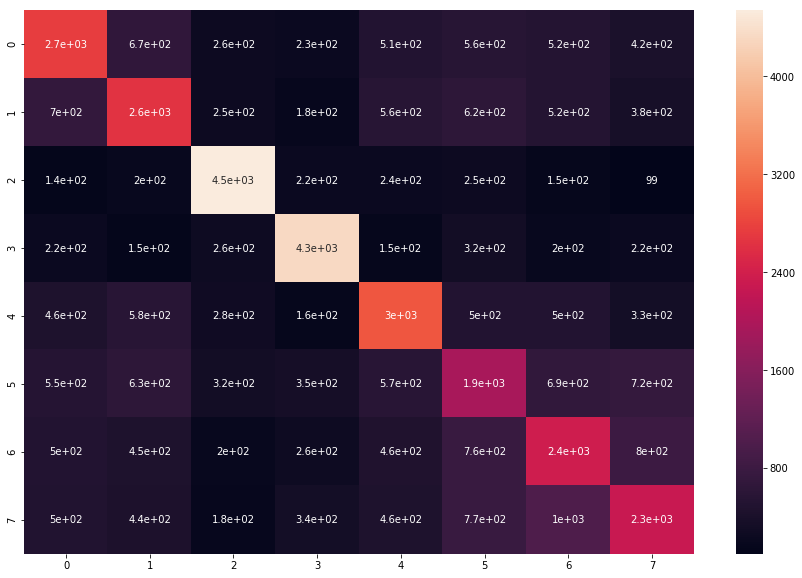

In [79]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True)


In [0]:
# applying bagging for above decision tree

In [54]:
dt_bag=BaggingClassifier(base_estimator=dt,random_state=100,n_jobs=-1)
dt_bag.fit(X_train_2,y_train)
dt_bag_pred=dt_bag.predict(X_test_2)
ac_dt_bag=accuracy_score(dt_bag_pred,y_test)
print('Accuracy Score:', ac_dt_bag)

Accuracy Score: 0.6302860563560952


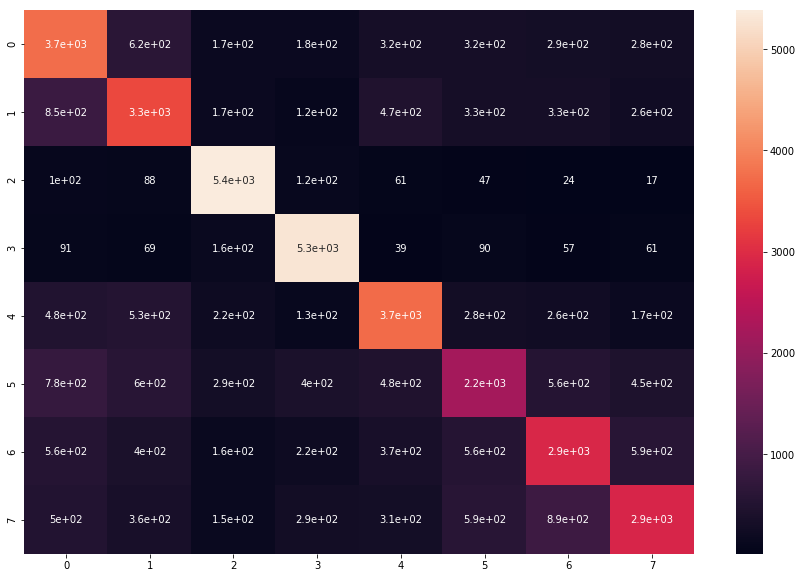

In [78]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test,dt_bag_pred),annot=True)


In [59]:
#Applying base knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train_2,y_train)
y_pred_knn=knn.predict(X_test_2)
ac_knn=accuracy_score(y_pred,y_pred_knn)
print('Accuracy Score:', ac_knn)

Accuracy Score: 0.5508402103732843


In [68]:
from sklearn.ensemble import AdaBoostClassifier
# base estimator
rf=RandomForestClassifier(n_estimators=50, random_state=100,criterion='gini',n_jobs=-1)
# adaboost with the tree as base estimator
adaboost_model_rf = AdaBoostClassifier(
    base_estimator=rf)
# fit
adaboost_model_rf.fit(X_train_2, y_train)
y_pred_rf_boost=adaboost_model_rf.predict(X_test_2)
accuracy_score(y_test,y_pred_rf_boost)

0.743661008252448

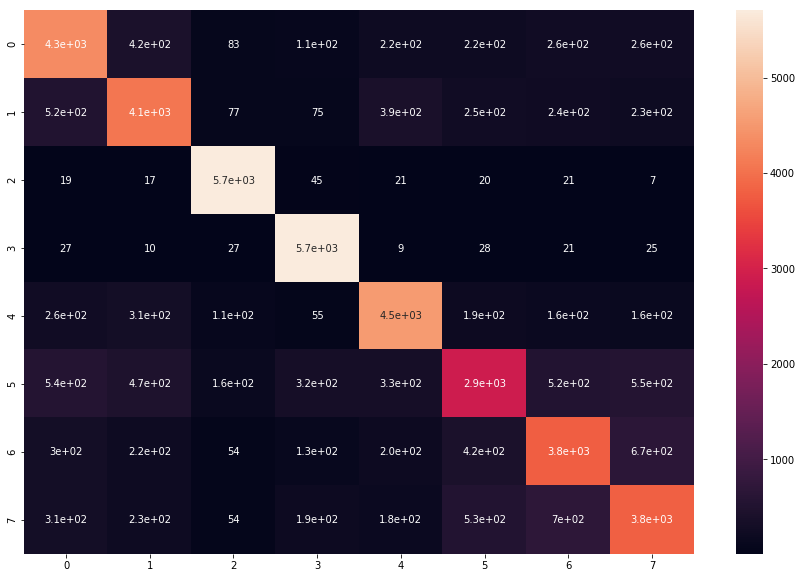

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test,y_pred_rf_boost),annot=True)
